<div style="display: flex; align-items: center;">
    <img src="https://www.avantihnw.com/api/rp/w1200/h630/aHR0cHM6Ly93d3cuYXZhbnRpaG53LmNvbS9kYXRhL2VuLzEvMDEvZmVkYmMyMTItN2M3Zi00NTJjLWE4YmItMjQ3Nzk5OTRlMWUyLmpwZw===.jpg" alt="Image Alt Text" width="500" height="200" style="margin-right: 20px;">
    <div style="font-size: 60px;">
         <strong> 3<sup>rd</sup> lab <strong>
    <div style="font-size: 40px;margin-right: 30px">
         <strong> MRI: DICOM Images <strong>
    </div>
</div>

<table>
  <tr>
    <td style="background-color: rgba(114, 147, 203, 0.9); font-size: 15px; color: white; padding: 20px;">
      <div style="font-size: 20px"> 
          <strong>XCT Module (2 x 2h)</strong><br>
      </div>  
      <ul>
        <li> <strong> Week 1 : visualisation and using of ready-to-use functions</strong> (2h)</li>
        <ul>
           <li> discover scikit image libary for XCT 
           <li> read files
           <li> plot profiles and global criteria
           <li> projections, sinograms
           <li> reconstruction with library functions (inverse Radon, FBP, SART)
        </ul>
        <br> 
        <li> <strong> Week 2 : code writing and analyses</strong> (2h)</li>
        <ul>
           <li> SART reconstruction code
           <li> FBP coding
           <li> compare with ready-to-use functions
           <li> use of global and local metrics to compare the results
        </ul>
    </td>
    <td style="background-color: rgba(225, 151, 76, 0.7); font-size: 15px; color: white; padding: 20px; vertical-align: top;">
    <div style="font-size: 20px"> 
        <strong> MRI Module (2 x 2h)</strong><br>
    </div> 
    <ul>
        <li> <strong> Week 3 : visualisation and using of ready-to-use functions</strong> (2h)</li>
        <ul>
           <li> read files, analyse the data and the image content
           <li> using DICOM
        </ul>
        <br> 
        <li> <strong> Week 4 : Explore 3D images, windows and views </strong> (2h)</li>
        <li> using NIfTI images
    </td>
    <td style="background-color: rgba(132, 186, 91, 0.8); font-size: 15px; color: white; padding: 20px; vertical-align: top;">
    <div style="font-size: 20px"> 
      <strong> Numerisation Module (2 x 2h)</strong><br>
    </div> 
      <ul>
        <li> <strong> Week 5 : depth map exploration </strong> (2h)</li>
        <br> 
        <li> <strong> Week 6 : point cloud and mesh understanding</strong> (2h)</li>
    </td>
  </tr>
</table>


<div style="display: flex; align-items: center;">
    <img src="https://img.freepik.com/premium-vector/warning-signs-high-voltage-hazard-isolated-white-background_68708-427.jpg?w=2000" alt="Image Alt Text" width="50" height="50" style="margin-right: 20px;">
    <div style="font-size: 15px;margin-right: 30px">
            Each lab must be completed before the beginning of the other lab session. 
        <br> 
          <strong>Don't forget to entitle your .ipynb file with your name and surname. <strong>
        <br> 
         The final submission of the first module has to be done <strong> by Thursday 19<sup> th</sup> October before 10 am.</strong>
    </div>
</div>

<table>
      <td style="border-left: 3px solid rgba(114, 147, 203, 0.9); background-color: rgba(114, 147, 203, 0.1); font-size: 15px; color: blakc; padding-left: 30px;">
        Don't forget to legend your figures and graphs. Interpretations are expected and must by short but comprehensive.  
      </td>
</table>

#### Contact : meghna.parameswaran-ayyar@u-bordeaux.fr

We saw two types of normalizations last week. There is another method which uses two metadata fields of the DICOM

### **METHOD 3:** Windowing

1. Load the `sample_mri.dcm` and get the WindowWidth and WindowCenter values. These two vaues give you the intensities of interest in the scan.
2. Use the center and the width to find the range of intensities that are of interest in the MRI. 
3. Use `np.clip` to discard the intensities that lie beyond the range that you calculated above
4. Use the min-max method to normalize the values to [0, 255]
5. Plot the final image and the corresponding colorbar

**Library Imports**

In [46]:
import pydicom
from pydicom import dcmread
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from scipy import ndimage

Loading data

In [5]:
filename = "sample_mri.dcm" 
dataset = dcmread(filename) 
window_width = dataset.WindowWidth
window_center = dataset.WindowCenter

image = dataset.pixel_array

print(f'Window width is: {window_width}')
print(f'Window center is: {window_center}')

Window width is: 6083
Window center is: 3041


**Normalization**

In [6]:
MAX_VAL = 255
def min_max_normalization(image, min_val, max_val):
    image = (image - min_val) / (max_val - min_val)
    return image * MAX_VAL

In [7]:
def windowing_normalization(image, window_center, window_width):
    min_intensity = max(0, window_center - (window_width / 2))
    max_intensity = window_center + (window_width / 2)

    clipped_image = np.clip(image, min_intensity, max_intensity)
    min_max_normalized_image = min_max_normalization(clipped_image, min_intensity, max_intensity)
    
    return min_max_normalized_image, min_intensity, max_intensity

In [36]:
min_max_normalized_image, min_intensity, max_intensity = windowing_normalization(image, window_center, window_width)

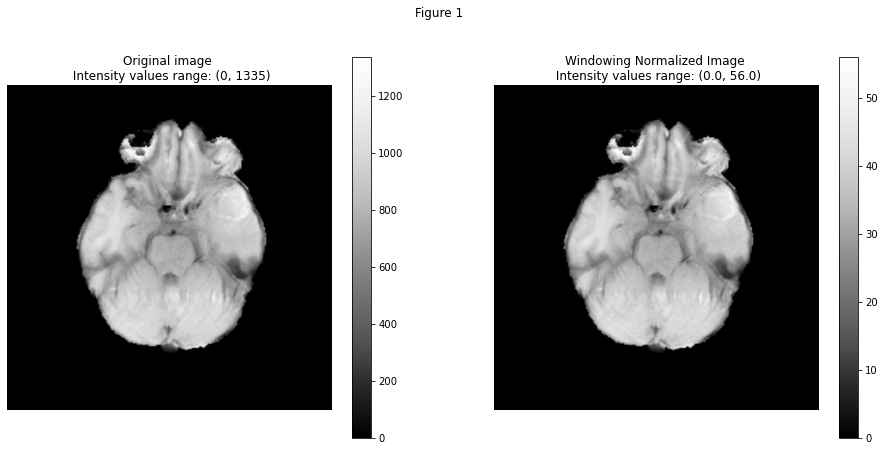

In [37]:
plt.figure(figsize=(16, 7))

plt.suptitle('Figure 1')
plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.title(f'Original image \n Intensity values range: ({np.min(image)}, {np.max(image)})')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(min_max_normalized_image, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.title(f'Windowing Normalized Image \n Intensity values range: ({np.min(min_max_normalized_image)}, {round(np.max(min_max_normalized_image), 1)})')
plt.axis('off')

plt.show()

**Changing the window width to 4500**

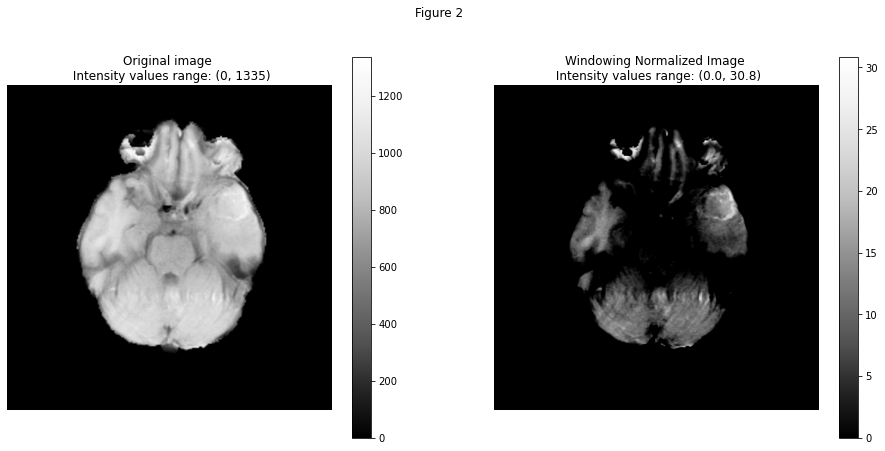

In [35]:
min_max_normalized_image, min_intensity, max_intensity = windowing_normalization(image, window_center, 4500)

plt.figure(figsize=(16, 7))

plt.suptitle('Figure 2')
plt.subplot(1,2,1)
plt.imshow(image, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.title(f'Original image \n Intensity values range: ({np.min(image)}, {np.max(image)})')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(min_max_normalized_image, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.title(f'Windowing Normalized Image \n Intensity values range: ({np.min(min_max_normalized_image)}, {round(np.max(min_max_normalized_image), 1)})')
plt.axis('off')

plt.show()

1. Comment on the range of intensities in the colorbar with this method and the other 2 from the previous lab

**Comparing windowing normalization results using different window widths (Figures 1&2)** <br>
a. The windowing normalization helps to enhance the visibility of specific features or structures within an image by adjusting the contrast and brightness of the image. The window width parameter helps to select what range of the image's intensity values are kept after normalizing i.e which ones are mapped to the grayscale range, so by reducing the window width from 6083 to 4500 (in Figure 1 and 2) respectively, we see that only the really bright (white) pixel values are kept, with others set to 0. 

**Comparing windowing normalization results using different window widths (Figure 1 and previous lab)**
Observing the plots (specifically the range of the colourbar) of the original image and the Windowing Normalized Image, It is noticed that the pixel intensity of the original image ranges from 0 to 1335 and that of the windowed image ranges from 0 to 56, as compared to (0 to 5) of normalizing by dividing by 255 and (0 to 255) of min max normalization. 


A small caveat for this exercise is, as previously discussed, the images we use in this lab are already pre-processed. So you may not notice a visible change in the image while viewing it. Plot the colorbar to see the effect of this normalization. In the further sections we will work with 3D images where you will be able to vizualize the difference.

<div style="display: flex; align-items: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/0/03/T1-weighted-MRI.png" alt="Image Alt Text" width="100" height="100" style="margin-right: 20px;">
    <div style="font-size: 20px;margin-right: 30px">
         <strong> Reading and Understanding NIfTI <strong>
    </div>
</div>

## NIfTI: Neuroimaging Informatics Technology Initiative

It is a data format for the storage of MRI and other medical images

Ref: https://neuraldatascience.io/8-mri/nifti.html

The goal of this assignment is to be able to open, display and reader the header information from a `.nii` file.

NIfTI-1, DICOM, and ANALYZE are three distinct formats used in the field of medical imaging, and they serve different purposes and have different characteristics. Here's a comparison of these formats:

#### Purpose:

- NIfTI-1: NIfTI-1 is primarily used for neuroimaging data, particularly in the context of MRI and fMRI data. It is designed to store and share imaging data in a standardized and flexible manner.

- DICOM: DICOM (Digital Imaging and Communications in Medicine) is a widely used format in medical imaging for storing and exchanging various types of medical images, not limited to neuroimaging. It includes a broader range of medical imaging modalities, such as X-rays, CT scans, ultrasound, and more.

- ANALYZE: ANALYZE is an older format primarily used for storing 3D and 4D (spatiotemporal) medical imaging data. It was widely used in the past but has been largely replaced by NIfTI-1 and DICOM due to their improved features and standards.

#### Metadata and Flexibility:

- NIfTI-1: NIfTI-1 provides a standardized header that includes metadata about the data, making it easier to interpret and work with. It also allows for optional extensions to store additional information, increasing its flexibility.

- DICOM: DICOM is highly standardized and includes extensive metadata for various types of medical images. It is designed to accommodate a wide range of medical imaging equipment and modalities, making it highly flexible.

- ANALYZE: ANALYZE has a simpler header compared to NIfTI-1 and DICOM, which can limit its ability to capture extensive metadata. It is less flexible in comparison.

#### Coordinate System:

- NIfTI-1: NIfTI-1 defines a standard coordinate system for data, which helps ensure consistency when working with brain images.

- DICOM: DICOM does not prescribe a specific coordinate system. Instead, it includes patient position and orientation information that can vary between different modalities and vendors.

- ANALYZE: ANALYZE does not define a standard coordinate system either. It relies on basic orientation information in the header.

#### Compression:

- NIfTI-1: NIfTI-1 files can be optionally compressed using GZIP, which can help reduce file sizes.

- DICOM: DICOM files can also be compressed, often using lossless compression methods like JPEG-LS or JPEG2000.

- ANALYZE: ANALYZE files typically do not include built-in compression options.

In summary, NIfTI-1, DICOM, and ANALYZE are three distinct formats used in medical imaging, with NIfTI-1 being specifically tailored to neuroimaging, DICOM being a broader standard for medical imaging, and ANALYZE being an older format that has been largely replaced by NIfTI-1 and DICOM in modern medical imaging practice. The choice of format depends on the specific imaging modality and the needs of the research or clinical application.

<div style="display: flex; align-items: center;">
    <img src="https://nipy.org/nibabel/_static/nibabel-logo.svg" alt="Image Alt Text" width="100" height="100" style="margin-right: 20px;">
    <div style="font-size: 20px;margin-right: 15px">
           We will use <strong>Nibabel</strong>. 
    </div>
</div>

Install nibabel library locally. (https://nipy.org/nibabel/)

In [38]:
!pip install nibabel

     |████████████████████████████████| 3.3 MB 63 kB/s eta 0:00:011


In [39]:
import nibabel as nib

There is a compressed `.nii` file provided along with the notebook. 
1. Read this NIfTI file. (Ensure it is saved in the same folder as this notebook)

In [41]:
img = nib.load('sample_MRI.nii.gz')

You will notice that the image you read is an object of a custom class. 

In [42]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>



2. Similar to DICOM, these files also have a header with some metadata provided. Explore a way to access all the keys and identify some interesting ones

Extra reference: Qform, Sform : https://gru.stanford.edu/doku.php/mrtools/coordinatetransforms for some info about some of the fields (if you are curious about it)

In [43]:
print(img)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (160, 256, 256)
affine:
[[-9.97825503e-01 -4.96572368e-02 -4.33403999e-02  8.83866501e+01]
 [-4.96986546e-02  9.98764277e-01 -1.22058249e-04 -1.20313904e+02]
 [-4.32929024e-02 -2.03216658e-03  9.99060333e-01 -1.16319778e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 160 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.          0.99999994  1.          0.99999994  0.          0.
  0.          0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units   

**Comment**

From the header information printed above, it was observed that it contains important details about the Nifti Image, some of which include:

1. The data dimension in the metadata which specifies the dimensions of the image data, such that the first index specifies if it a 2D or 3D image by being either 2 or 3 respectively. The successive dimensions dim[1], dim[2], and dim[3] show the size of the X, Y, and Z dimensions

2. The datatype field in the metadata indicates the range of values in the image via the datatype, such that 0-225 images have type uint8, 0-1 have type float etc 

3. The pixdim field contains the physical size of a voxel in each dimension.

The header also has some methods that you can use to get extra data. Try the following code and observe what they might be useful for?


Note: MRI is 3D and fMRI is (3D + time). This might affect what you see as output

In [44]:
header_object = img.header
print(header_object.get_zooms())
print(header_object.get_xyzt_units())

(0.99999994, 1.0, 0.99999994)
('mm', 'unknown')


**ANSWER** <br>

The header files printed using the getter functions **get_zooms** and **get_xyzt_units** are an array of values  having the voxel dimensions of the image i.e the size of a voxel in each dimension, and the unit of measurement used for the voxel dimensions (pixdim) respectively. 

3. Access the data from the object and identify the type and shape of data. 

In [45]:
nifti_data = img.get_fdata()
print(f'Data Type: {type(nifti_data)}')
print(f'Data Shape: {nifti_data.shape}')

Data Type: <class 'numpy.ndarray'>
Data Shape: (160, 256, 256)


4. Is the acquisition shape of this MRI a cube? (look at the dimensions of the data and Comment)

The acquired MRI stored as a Nifti Image is not a cube as its dimensions are (160, 256, 256) which are not equal in all sides (dimensions). It however is a rectangular 3D volume but with different dimensions in each direction. 

### Visualizing the Slices

Unlike DICOM the .nii image is for MRI is a 3D image. 

1. Can you list the 3 types of views that we have for neuroimaging? (eg Saggital etc...)

**ANSWER**
1. The Coronal View, which shows a frontal view of the brain e.g in a front to back orientation. 
2. The Axial / Transverse View, which shows a cross-sectional view of the brain e.g from top to bottom or bottom to top.
3. The Sagittal View, which shows a side view of the brain e.g from left to right or vice versa.

As we have a 3D image, we need to choose one slice to visualize at a time. 

2. Choose any slice from the x-axis (first index) of your data and plot it using `matplotlib`. If the view is rotated use `ndimage.rotate` to correct the orientation of the matrix

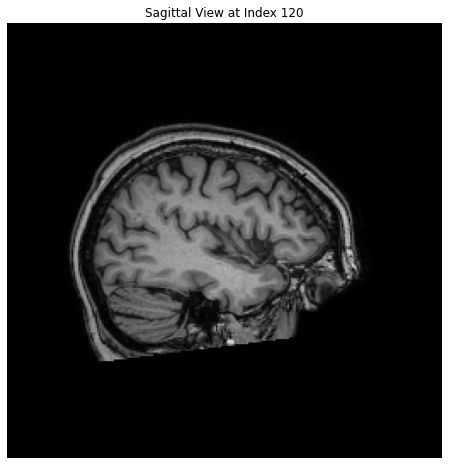

In [54]:
index = 120

sagittal_slice = nifti_data[index, :, :]

sagittal_slice = ndimage.rotate(sagittal_slice, 90, reshape=False)

plt.figure(figsize=(8, 8))
plt.imshow(sagittal_slice, cmap='gray')
plt.title(f"Sagittal View at Index {index}")
plt.axis('off')
plt.show()

3. Plot the same slice for the 3 different views (choose the same index slice for the 3 dimensions of the matrix). Use caption to name the views correctly

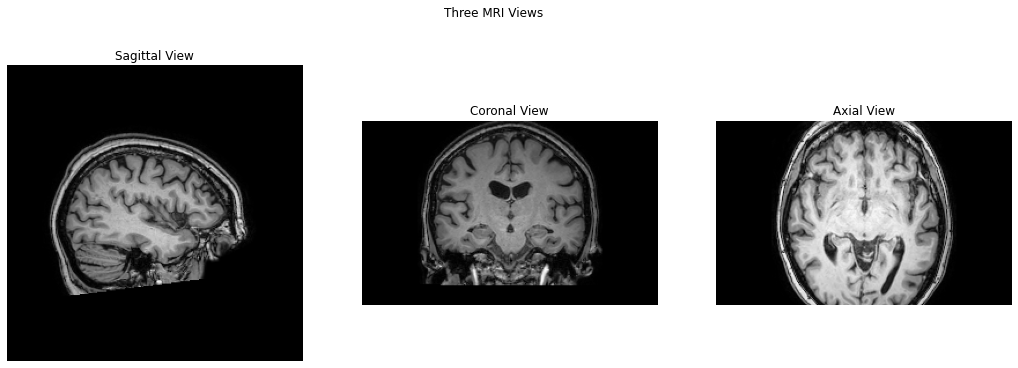

In [74]:
coronal_slice = nifti_data[:, index, :]
axial_slice = nifti_data[:, :, index]

coronal_slice = ndimage.rotate(coronal_slice, 90, reshape=False)
axial_slice = ndimage.rotate(axial_slice, 90, reshape=False)

plt.figure(figsize=(18, 6))

plt.suptitle('Three MRI Views')
plt.subplot(1,3,1)
plt.imshow(sagittal_slice, cmap=plt.cm.Greys_r)
plt.title('Sagittal View')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(coronal_slice, cmap=plt.cm.Greys_r)
plt.title('Coronal View')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(axial_slice, cmap=plt.cm.Greys_r)
plt.title('Axial View')
plt.axis('off')

plt.show()

### Investigate at the intensities

1. Can you choose small 3 x 3 x 3 size voxel patch from your image and visualize the values in it?

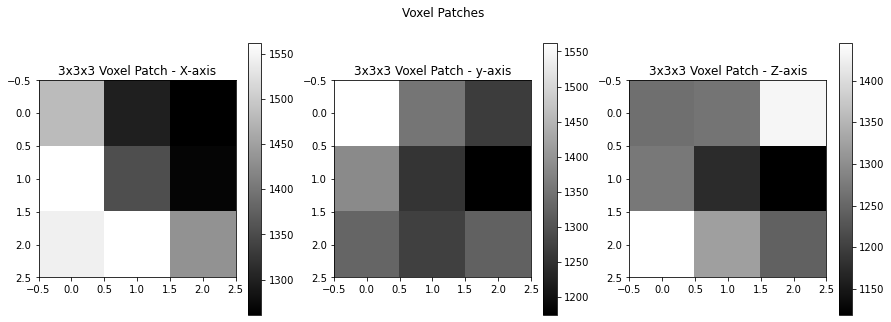

In [63]:
center_x = 100
center_y = 100
center_z = 100

patch = nifti_data[center_x - 1:center_x + 2, center_y - 1:center_y + 2, center_z - 1:center_z + 2]

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(patch[0, :, :], cmap='gray')
plt.title("3x3x3 Voxel Patch - X-axis")
plt.colorbar()
plt.subplot(132)
plt.imshow(patch[:, 1, :], cmap='gray')
plt.title("3x3x3 Voxel Patch - y-axis")
plt.colorbar()
plt.subplot(133)
plt.imshow(patch[:, :, 2], cmap='gray')
plt.title("3x3x3 Voxel Patch - Z-axis")
plt.colorbar()
plt.suptitle('Voxel Patches')
plt.show()

2. Do these numbers convey any direct information? Can you guess what the range of the intensities in the image would depend on?

Yes, they convey information as Higher values represent higher intensity.

3. Plot any slice of your choice like before but this time add the colorbar to observe the range of the intensities in that slice

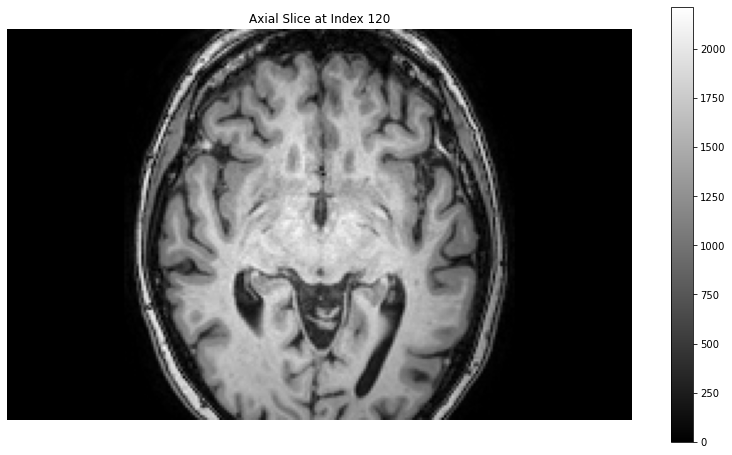

In [66]:
plt.figure(figsize=(14, 8))
plt.imshow(axial_slice, cmap='gray')
plt.title(f"Axial Slice at Index {index}")
plt.axis('off')
plt.colorbar()
plt.show()

From the colour bar in the plot above, it is opbserved that the pixel values in the Axial slice (at index 120) range from 0 to 2100

As seen in the last lab there a few ways to handle the range of intensities so as to display it as an image. By default matplotlib normalizes them  when you use the `imshow` function. 
For a particular slice try the following methods

**METHOD 1**: Naive Method
Divide the pixels values by 255 and use `np.clip` to display this image with `matplotlib`

As seen in the last lab this method as the name suggests is a 'Naive' way and can lead to loss in information


In [75]:
MAX_VAL = 255

def naive_method(image, maxval):
    image = image / maxval
    image = np.clip(image, 0, maxval)
    return image

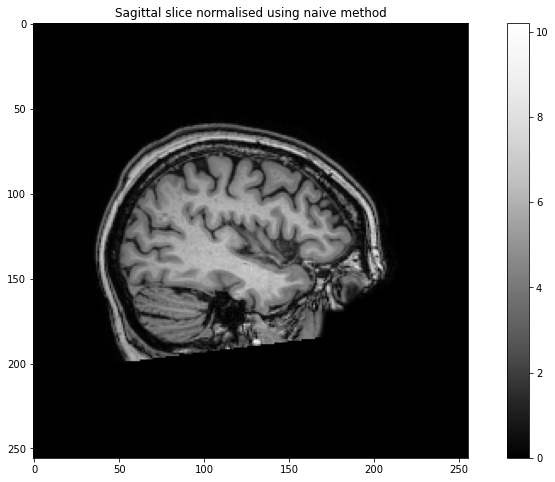

In [79]:
image_normalised = naive_method(sagittal_slice, MAX_VAL)

plt.figure(figsize=(14, 8))
plt.imshow(image_normalised, cmap=plt.cm.Greys_r)
plt.title('Sagittal slice normalised using naive method')
plt.colorbar()
plt.show()

**METHOD 2**: Min-Max Normalization

Do the min-max normalization for the whole image and visualize one slice. Also plot the colorbar and comment on what you observe

In [81]:
def min_max_method(image):
    min = np.min(image)
    max = np.max(image)
    print(f'Min value: {int(min)}')
    print(f'Max value: {int(max)}')
    image = (image - min) / (max - min)
    return image * MAX_VAL

Min value: 0
Max value: 2602


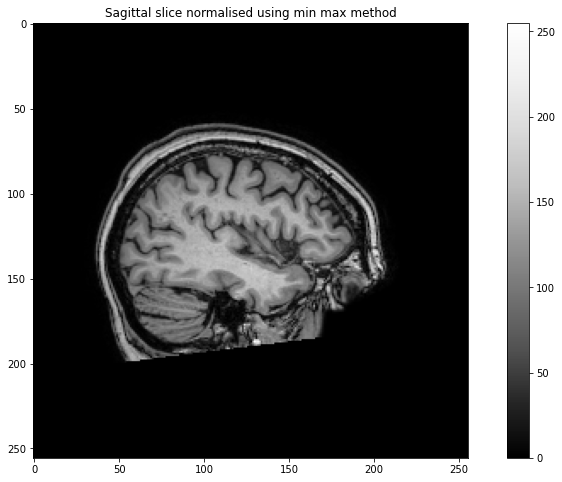

In [84]:
min_max_normalized_image = min_max_method(sagittal_slice)

plt.figure(figsize=(14, 8))
plt.imshow(min_max_normalized_image, cmap=plt.cm.Greys_r)
plt.title('Sagittal slice normalised using min max method')
plt.colorbar()
plt.show()

Observing the pixel values in the colour bar in both images, the min max normalized image ranges from 0 - 255 as it was initially normalized to 0 to 1 and multiplied by 255, and the naive normalized image ranges from 0 to 10

**METHOD 3**: Windowing

Get the max and min intensities of the whole 3D image. Select a window center and width of your choice and apply the method to a slice of the image and visualize it (plot the colorbar too)

The main observation is that we can use windowing method to highlight some intensities of choice if it is priorly known what some structures might look like in the scans.

You can plot the profile to compare the actual slice and the same slice after windowing. Comment on the graph of their intensities

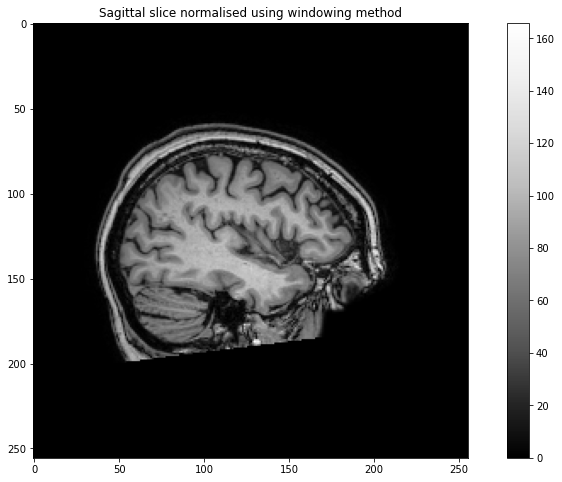

In [89]:
window_center = 2000
window_width = 4000

windowing_normalized_image, min_intensity, max_intensity = windowing_normalization(sagittal_slice, window_center, window_width)

plt.figure(figsize=(14, 8))
plt.imshow(windowing_normalized_image, cmap=plt.cm.Greys_r)
plt.title('Sagittal slice normalised using windowing method')
plt.colorbar()
plt.show()

**Intensity Profiles**

In [90]:
def obtain_intensity_profile(image, start_point, end_point):
    #Getting coordinates of start and end points
    x1, y1 = start_point
    x2, y2 = end_point
    
    line_pixels = np.linspace(start_point, end_point, num=int(np.sqrt((x2 - x1)**2 + (y2 - y1)**2)))
    
    intensity_profile = [image[int(y), int(x)] for x, y in line_pixels]
    return intensity_profile

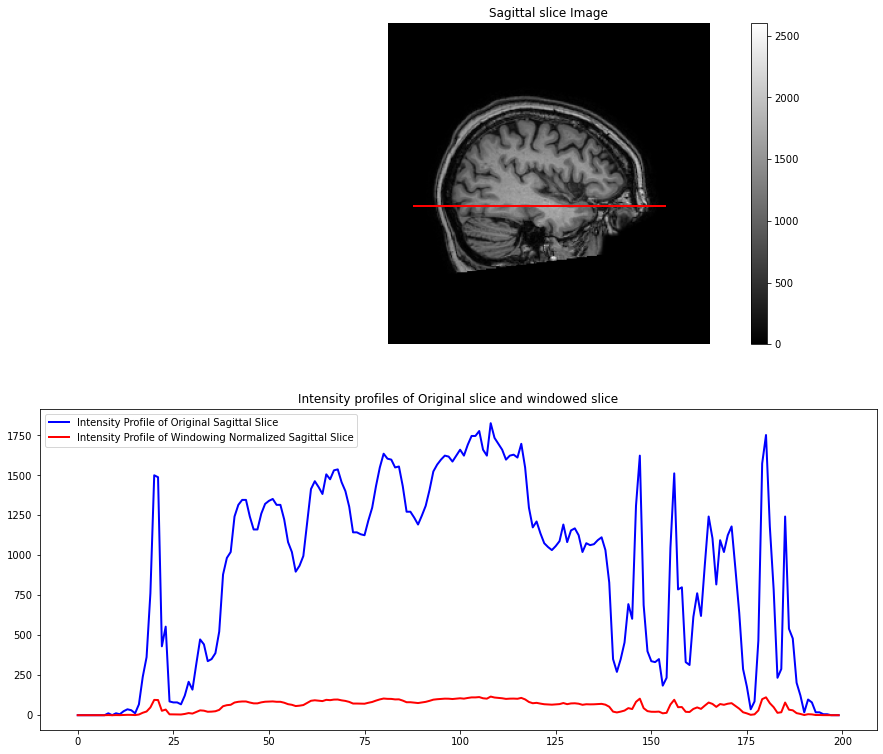

In [103]:
START_POINT = (20, 145)
END_POINT = (220, 145)


slice_profile = obtain_intensity_profile(sagittal_slice, START_POINT, END_POINT)
windowed_slice_profile = obtain_intensity_profile(windowing_normalized_image, START_POINT, END_POINT)

plt.figure(figsize=(15, 13))

plt.subplot(2, 1, 1)
plt.plot([START_POINT[0], END_POINT[0]], [START_POINT[1], END_POINT[1]], color='red', linewidth=2)
plt.imshow(sagittal_slice, cmap="gray")
plt.axis('off')
plt.title('Sagittal slice Image')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.plot(slice_profile, label='Intensity Profile of Original Sagittal Slice', color='blue', linewidth=2)
plt.plot(windowed_slice_profile, label='Intensity Profile of Windowing Normalized Sagittal Slice', color='red', linewidth=2)
plt.title('Intensity profiles of Original slice and windowed slice')
plt.legend()

plt.show()


**COMMENT**

Comparing the intensity profiles of the line (in red) drawn on the sagittal slice, it is observed that the pixel values have a  much higher value range and are higher in the original slice than in the windowed slice, hence why the intensity oscillations are more in the original slice as the scale is more sensitive to minor chnages in its values. 

**Further exploration**: Try the same for a different window center and width (either with the same view or you can change it - your choice). Comment on if you observe any changes

**Changing window center and width to 1500 and 5000 respectively**

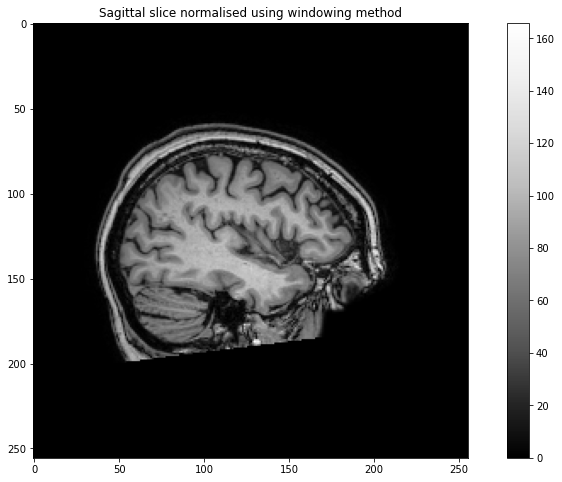

In [97]:
window_center = 1500
window_width = 5000

windowing_normalized_image, min_intensity, max_intensity = windowing_normalization(sagittal_slice, window_center, window_width)

plt.figure(figsize=(14, 8))
plt.imshow(windowing_normalized_image, cmap=plt.cm.Greys_r)
plt.title('Sagittal slice normalised using windowing method')
plt.colorbar()
plt.show()

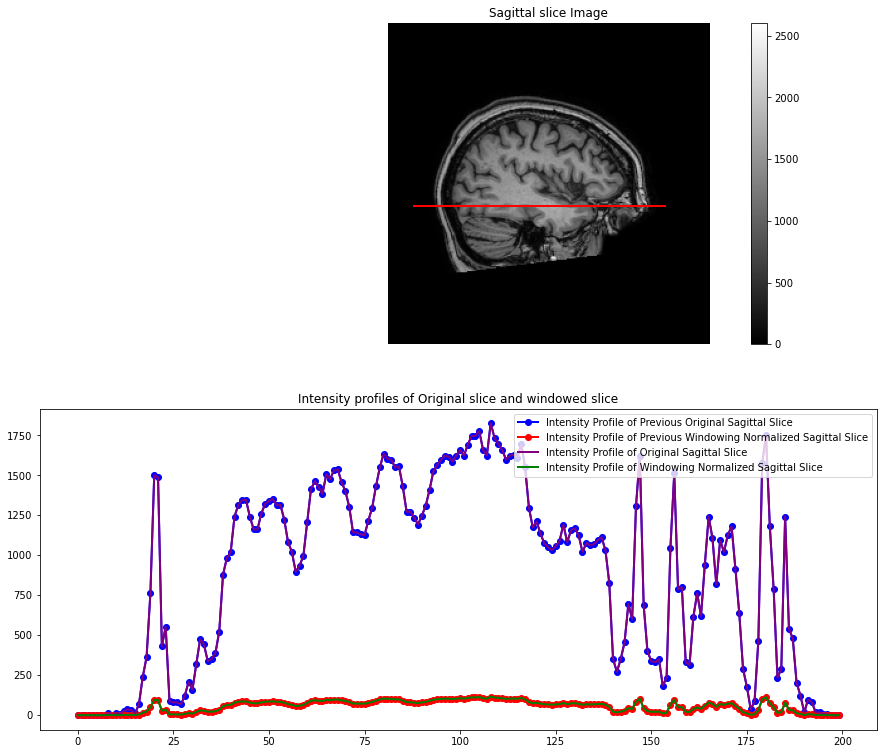

In [104]:
slice_profile_new = obtain_intensity_profile(sagittal_slice, START_POINT, END_POINT)
windowed_slice_profile_new = obtain_intensity_profile(windowing_normalized_image, START_POINT, END_POINT)

plt.figure(figsize=(15, 13))

plt.subplot(2, 1, 1)
plt.plot([START_POINT[0], END_POINT[0]], [START_POINT[1], END_POINT[1]], color='red', linewidth=2)
plt.imshow(sagittal_slice, cmap="gray")
plt.axis('off')
plt.title('Sagittal slice Image')
plt.colorbar()

plt.subplot(2, 1, 2)
plt.plot(slice_profile, marker='o', label='Intensity Profile of Previous Original Sagittal Slice', color='blue', linewidth=2)
plt.plot(windowed_slice_profile, marker='o', label='Intensity Profile of Previous Windowing Normalized Sagittal Slice', color='red', linewidth=2)

plt.plot(slice_profile_new, label='Intensity Profile of Original Sagittal Slice', color='purple', linewidth=2)
plt.plot(windowed_slice_profile_new, label='Intensity Profile of Windowing Normalized Sagittal Slice', color='green', linewidth=2)
plt.legend()
plt.title('Intensity profiles of Original slice and windowed slice')

plt.show()

**Comment**

Observing the intensity profile plots, it can be seen that the pixels have the same values.

### Display multiple slices

This is a simple python code exercise. 

Write a code to display any 3 consecutive slices (closer to the center) from the 3 views as a grid using `matplotlib` and use `subplots` to display the slices in a grid with the colorbar. (You can use either Method 2 or 3 for the normalization)

Min Max Normalization

Min value: 0
Max value: 3143
Min value: 0
Max value: 3118
Min value: 0
Max value: 2645
Min value: 0
Max value: 2079
Min value: 0
Max value: 2374
Min value: 0
Max value: 2220
Min value: 0
Max value: 4109
Min value: 0
Max value: 3943
Min value: 0
Max value: 3838


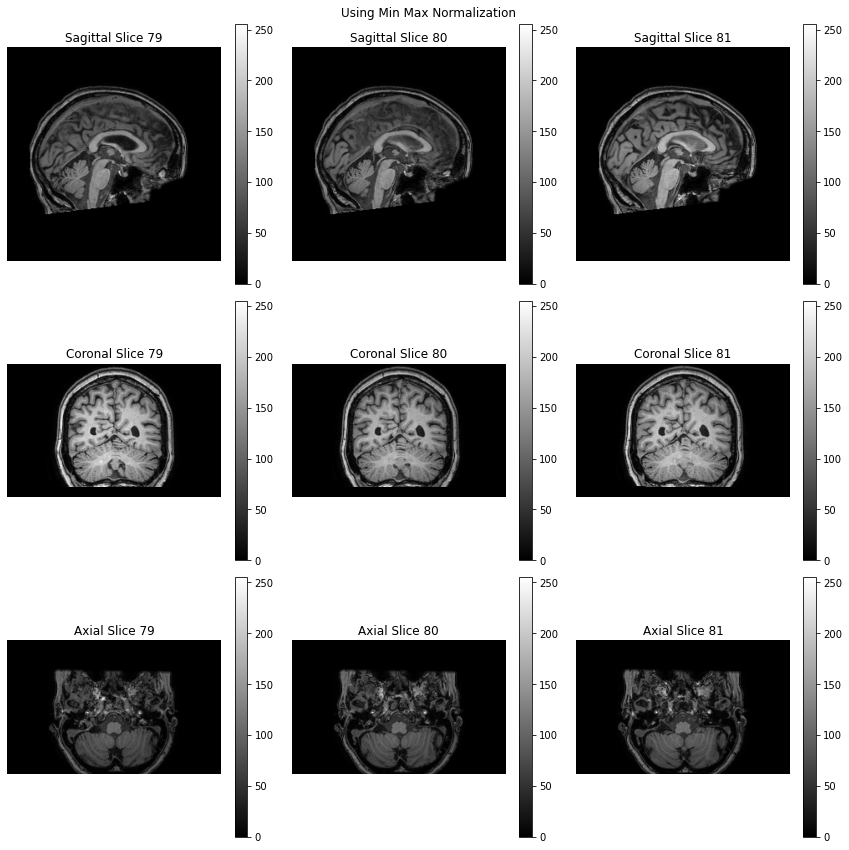

In [106]:
center_slice_index = nifti_data.shape[0] // 2

slices = [center_slice_index - 1, center_slice_index, center_slice_index + 1]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, view in enumerate(["Sagittal", "Coronal", "Axial"]):
    for j, slice_index in enumerate(slices):
        if view == "Sagittal":
            slice_data = nifti_data[slice_index, :, :]
        elif view == "Coronal":
            slice_data = nifti_data[:, slice_index, :]
        else:
            slice_data = nifti_data[:, :, slice_index]

        slice_data = ndimage.rotate(slice_data, 90, reshape=False)

        # Using the min-max normalisation
        normalized_slice = min_max_method(slice_data)

        im = axs[i, j].imshow(normalized_slice, cmap='gray')
        axs[i, j].set_title(f"{view} Slice {slice_index}")
        axs[i, j].axis('off')
        bar = fig.colorbar(im, ax=axs[i][j])

fig.suptitle("Using Min Max Normalization")
plt.tight_layout()
plt.show()

## Other References

1. Nilearn: is another library that has more functions for plotting and ML tools (using scikit-learn) to work with biomedical images (https://nilearn.github.io/stable/index.html)
2. https://neuraldatascience.io/8-mri/read_viz.html (Some notes for both DICOM and NIfTI)
3. Some basic idea of MRI: https://www.weizmann.ac.il/chembiophys/assaf_tal/sites/chemphys.assaf_tal/files/uploads/MRI2021/Lecture%202%20-%20MRI%20As%20a%20Black%20Box.pdf
4. https://imagej.net/software/fiji/downloads#installation Is a tool you can use to view the image